<a href="https://colab.research.google.com/github/zideric/colab/blob/main/Classificazione_Multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificazione Multiclasse
utilizziamo Keras per la classificazione multiclasse. il dataset contiene immagini di numeri scritti a mano da 0 a 9. il modello deve riconoscere l'immagine e attribuire il numero corrispondente

Importiamo i moduli


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

## Caricamento del dataset

il dataset è da scaricare sul sito MNIST, dobbiamo creare la cartella MNIST e inserire i dati in questa.  
Il dataset MNIST va scaricato da questo [link](http://yann.lecun.com/exdb/mnist/), devi scaricare i seguenti 4 files:

* train-images-idx3-ubyte.gz
* train-labels-idx1-ubyte.gz
* t10k-images-idx3-ubyte.gz
* t10k-labels-idx1-ubyte.gz
poi decomprimili e inseriscili all'interno di una cartella "MNIST", senza rinominarli.

In [5]:
!mkdir MNIST


MNIST  sample_data


Colleghiamo google drive cosi possiamo importare i file scaricati dal sito del MNIST

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
!ls drive/MyDrive/'Colab Notebooks'


Udemi_reti_neurali_artificiali.ipynb  Untitled0.ipynb


In [16]:
!cp drive/MyDrive/Colab\ Notebooks/*ubyte MNIST/

la seguente funzione mi permette di caricare i file del MNIST

In [8]:
import numpy as np
import os
import struct

def load_mnist(path="/"):
    
    train_labels_path = os.path.join(path,"train-labels-idx1-ubyte")
    train_images_path = os.path.join(path,"train-images-idx3-ubyte")
    
    test_labels_path = os.path.join(path,"t10k-labels-idx1-ubyte")
    test_images_path = os.path.join(path,"t10k-images-idx3-ubyte")
    
    labels_path = [train_labels_path, test_labels_path]
    images_path = [train_images_path, test_images_path]
        
    labels = []
    images = []
        
    for path in zip(labels_path, images_path):
        
        with open(path[0],'rb') as lbpath:
            magic, n = struct.unpack('>II', lbpath.read(8))
            lb = np.fromfile(lbpath, dtype=np.uint8)
            labels.append(lb)
            
        with open(path[1], 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
            images.append(np.fromfile(imgpath, dtype=np.uint8).reshape(len(lb), 784))
            
    return images[0], images[1], labels[0], labels[1]

importiamo i file

In [17]:
X_train, X_test, y_train, y_test = load_mnist(path="MNIST")
print("Numero totale di proprietà: "+str(X_train.shape[1]))
print("Esempi di training: "+str(X_train.shape[0]))
print("Esempi di test: "+str(X_test.shape[0]))

Numero totale di proprietà: 784
Esempi di training: 60000
Esempi di test: 10000


Abbiamo 784 proprietà.
ogni proprieta (o colonna) rappresenta un pixel dell'immagine, il vettore contiene quindi tutti i pixel su un unica riga.

con il metodo reshape lo formattiamo in una matrice 28*28 e con imshow di matplot la visualizziamo

il dataset è composto da 60000 elementi per il training e 10000 per il test

la cifra nell'immagine è un 5


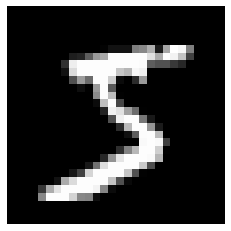

In [18]:
plt.imshow(X_train[0].reshape([28,28]),cmap="gray")
plt.axis('off') #rimuoviamo i valori sulle assi
print("la cifra nell'immagine è un %d" % y_train[0])

## Processing dei dati
l'output è espresso da un numero che vsa da 0 a 9 e rappresenta l'immagine mostrata.

la nostra rete quindi dovrà avere 10 NODI di output, quindi dobbiamo creare 10 output differenti utilizzando delle dummy variables

In [19]:
from keras.utils import to_categorical

num_classes=10

y_train_dummy = to_categorical(y_train,num_classes)
y_test_dummy = to_categorical(y_test, num_classes)

y_train_dummy[0] #il valore è 5 e il risultato è il seguente dopo in corrispondenza del 5 valore abbiamo 1, negli altri abbiamo 0 


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Trattandosi di immagini è opportuno eseguire la normalizzazione. Siccome i valori vanno da 0 a 255 in questo caso non ci serve appoggiarci su funzioni di normalizzazione, ci basta dividiere tutti i valori per 255 (che è il valore massimo)

In [21]:
y_train[0]



5